___
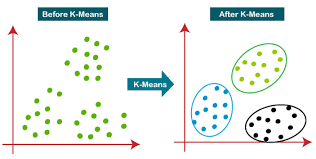


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2024
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___


### <font color= #2E9AFE> Tema: Clustering</font>

### K-means

**Cuándo usarlo:**

- Conjuntos de datos grandes: K-means es generalmente más eficiente en términos de tiempo y es adecuado para conjuntos de datos grandes. Su algoritmo de optimización es rápido y escala bien con el tamaño del conjunto de datos.
- Grupos con distribución esférica o bien separados: K-means funciona mejor si los clusters tienen una forma esférica.
- Número de clusters predefinido: Si ya tienes una idea del número de clusters que quieres, K-means es adecuado.

**Ventajas:**

- Escalable para grandes volúmenes de datos.
- Algoritmo rápido y eficiente.
- Fácil de interpretar y visualizar en algunas aplicaciones.

**Desventajas:**

- Requiere predefinir el número de clusters (k).
- Sensible a la selección inicial de centroides.

### Clustering Jerárquico

**Cuándo usarlo:**

- Conjuntos de datos pequeños a medianos: Debido a su complejidad computacional, el clustering jerárquico es adecuado para conjuntos de datos más pequeños o medianos, ya que la eficiencia se ve afectada a medida que el tamaño del conjunto de datos aumenta.
- Estructuras de clusteres de forma arbitraria: Si los clústeres no son necesariamente esféricos y pueden variar en tamaño y forma, el clustering jerárquico puede capturar estas variaciones mejor que K-means.
- Análisis exploratorio: Es útil si deseas explorar los datos y observar cómo se agrupan a diferentes niveles, ya que genera un dendrograma que te permite visualizar y entender la estructura jerárquica de los datos.
- Número de clústeres desconocido: Si no tienes una idea clara de cuántos clústeres quieres, el clustering jerárquico puede ayudar a identificar el número adecuado al analizar el dendrograma.


**Ventajas:**

- No requiere predefinir el número de clústeres.
- Proporciona una representación visual (dendrograma) de la estructura de los datos.
- Puede capturar clusters con formas y tamaños variados.

**Desventajas:**

- Costoso en términos de tiempo y memoria para grandes conjuntos de datos.
- Muy sensibles al ruido y a los atípicos.
- Menos eficiente que K-means cuando se escala a datos grandes.

### K-Means

Pasos

1. Seleccionar el número de grupos/clusters, "k" que queremos. 

2. Crear los "K" centroides.

3. Estos centroides no están optimizados. El entrenamiento implica mover los centroides hasta que estén en el centro de cada grupo. En este punto podemos determinar en qué grupo debería estar un punto de datos dado (el centroide al que está más cercano).

4. Con nuestros centroides iniciales, iteramos a través de los datos agrupando cada punto hasta el centroide al que está más cercano. Luego, cambiamos los centroides tomando el promedio de todos los puntos de datos en cada grupo.

4. El proceso se repite hasta que los centroides ya no cambien tanto. 

### Ejemplo 1 --> Iniciando con Kmeans

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Crear datos
data = np.array([  
    [4, 3], [0, 0], [2, 4], [3, 4], [5, 4], [-2, 1], [-3, 0], [-3, -3], [8, 12], [11, 11], [9, 10]  
])
data

array([[ 4,  3],
       [ 0,  0],
       [ 2,  4],
       [ 3,  4],
       [ 5,  4],
       [-2,  1],
       [-3,  0],
       [-3, -3],
       [ 8, 12],
       [11, 11],
       [ 9, 10]])

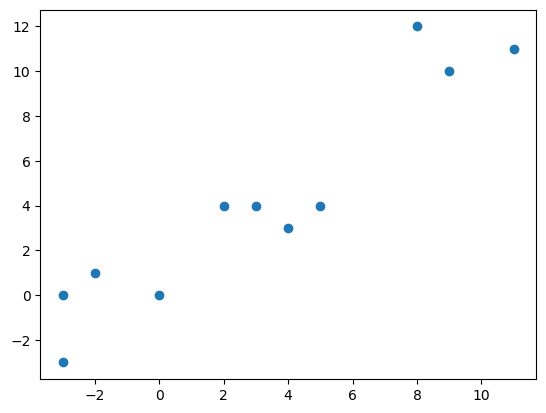

In [2]:
#Graficar datos
import matplotlib.pyplot as plt
plt.scatter(data[:,0], data[:,1])
plt.show()

In [3]:
#Inicializar kmeans
from sklearn.cluster import KMeans

#Inicializar objeto
kmeans = KMeans(
       init="random", #k-means++ #inicializar centroides aleatoriamente
       n_clusters=3,
       n_init=10, #cuantas veces se va a hacer el método de kmeans
       max_iter=300, #máximo numero de iteraciones
       random_state=42)

#Entrenar datos
kmeans.fit(data)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [4]:
#Predecir a qué grupo pertenece cada dato
y_means = kmeans.fit_predict(data)
y_means

array([1, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2])

In [5]:
#observar centroides de cada grupo
kmeans.cluster_centers_

array([[-2.        , -0.5       ],
       [ 3.5       ,  3.75      ],
       [ 9.33333333, 11.        ]])

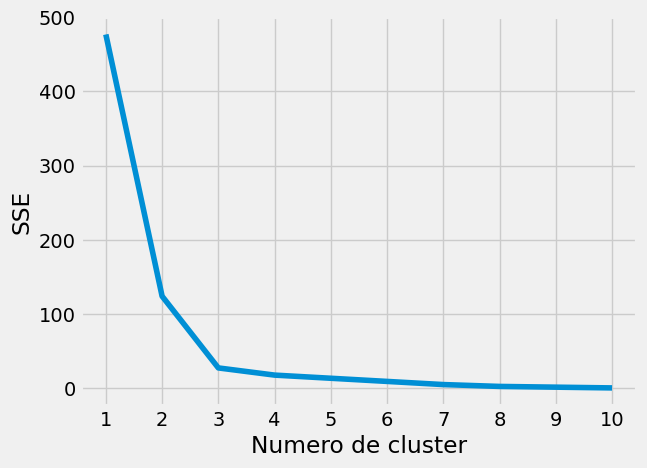

In [6]:
#y si no sabemos cuantos clusters usar?
#Elegir número de clusters (k)

kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 42,
}

#Calculamos la suma del error cuadrático (SSE) para cada "k" de clusters
sse=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)
    
#Graficamos
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Numero de cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
#pip install kneed

In [7]:
# o de forma más automatizada usando librería
from kneed import KneeLocator
kl = KneeLocator(
     range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

### Ejemplo 2 --> Kmeans en imágens

Aplicar K-means a imágenes tiene varias aplicaciones útiles, principalmente relacionadas con la simplificación de colores, segmentación y compresión de la imagen. 

Es común utilizar K-means en procesamiento de imágenes:

1. **Reducción de Colores:**

K-means agrupa los píxeles en varios clusters, donde cada cluster representa un color predominante en la imagen. Luego, cada píxel es reemplazado por el color promedio del cluster al que pertenece.
Esto reduce la complejidad de la imagen y permite mostrarla con una paleta de colores reducida, sin que la imagen pierda demasiada información visual.

2. **Segmentación de Imágenes:**

Dividir una imagen en diferentes regiones o segmentos que representen distintas partes de la imagen, como objetos o áreas de fondo.
La segmentación es útil para aplicaciones en visión artificial y procesamiento de imágenes, como el reconocimiento de objetos, la detección de bordes, o para analizar imágenes médicas donde cada región puede representar diferentes tejidos o estructuras.

In [ ]:
#pip install opencv-python

In [8]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [9]:
# Cargar imagen y convertirla a formato RGB
def cargar_imagen(path):    
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [10]:
#Funcion que transforma la imagen (la aplana) y aplica el Kmeans para reducir los colores a K clusters

def aplicar_kmeans(image, k):
    # Obtener dimensiones de la imagen
    h, w, c = image.shape
    
    # Aplanar la imagen en una matriz de píxeles (cada fila es un píxel con tres valores RGB)
    pixels = image.reshape(-1, 3)
    
    # Aplicar KMeans para reducir los colores a K clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(pixels)
    
    # Reemplazar los píxeles por los colores del cluster al que pertenecen
    new_colors = kmeans.cluster_centers_[kmeans.labels_]
    
    # Reconstruir la imagen en el mismo tamaño
    new_image = new_colors.reshape(h, w, c).astype(np.uint8)
    return new_image

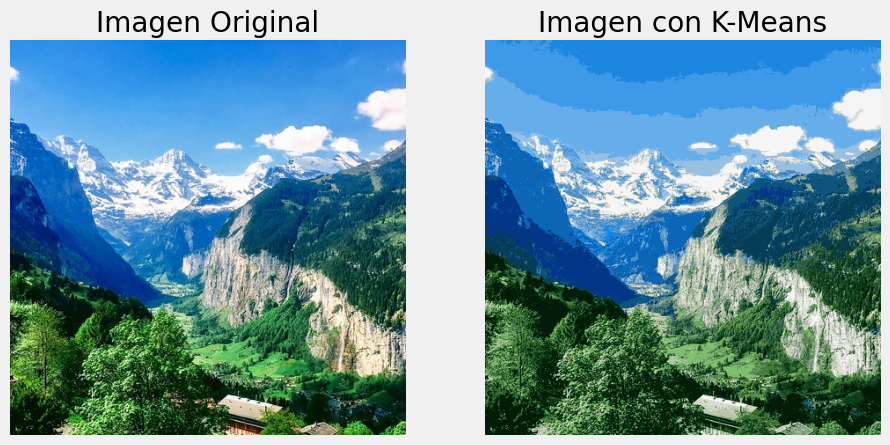

In [22]:
def plot_images(original, processed):
    # Visualizar la imagen original y la reconstruida
    plt.figure(figsize=(10, 5))
    
    # Imagen original
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title("Imagen Original")
    plt.axis("off")
    
    # Imagen procesada
    plt.subplot(1, 2, 2)
    plt.imshow(processed)
    plt.title("Imagen con K-Means")
    plt.axis("off")
    
    plt.show()

# Ruta de la imagen
image_path = 'prueba9.jpg'

# Cargar y procesar la imagen
image = cargar_imagen(image_path)
k = 20
# Número de colores (clusters) que quieres en la imagen procesada
processed_image = aplicar_kmeans(image, k)

# Visualizar las imágenes
plot_images(image, processed_image)


### Recomendaciones

- Normalización: poner los atributos en escalas similares
- Selección de características/reducción de dimensionalidad: es buena idea usar el menor número atributos posible debido a los que se conoce como la maldición de la dimensionalidad. A que a medida que el número de dimensiones (atributos) aumenta, la distancia discrimina cada vez menos.

#### Alguna bibliografía

Evaluación del modelo
- https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

Una guía práctica de clustering:
- https://realpython.com/k-means-clustering-python/


